<a href="https://colab.research.google.com/github/AviralTripathim22ma012/Advanced_Techniques_in_computer_vision/blob/main/YOLO_object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---


---


**YOLO OBJECT DETECTION**



---


---


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing necessary libraries

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Downloading config, weights, and coco.names files for pre-trained YOLO model

In [ ]:
!wget "https://pjreddie.com/media/files/yolov3.weights"

!wget "https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg"

!wget "https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names"

--2023-04-25 05:33:48--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  76.0MB/s    in 3.3s    

2023-04-25 05:33:52 (71.2 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

--2023-04-25 05:33:52--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s      


In [ ]:
yolo= cv.dnn.readNetFromDarknet("/content/yolov3.cfg", "/content/yolov3.weights")

In [ ]:
classes= []

with open("/content/coco.names", 'r') as f:
  classes= f.read().splitlines()

List of objects YOLO can detect

In [ ]:
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [ ]:
img= cv.imread("/content/drive/MyDrive/data.zip (Unzipped Files)/deer-test/6.jpg")
print(type(img))
print(img)

<class 'numpy.ndarray'>
[[[157 149 150]
  [159 151 152]
  [159 151 151]
  ...
  [157 146 148]
  [157 146 148]
  [157 146 148]]

 [[158 150 151]
  [159 151 152]
  [158 150 150]
  ...
  [156 145 147]
  [156 145 147]
  [155 147 148]]

 [[159 151 152]
  [158 150 151]
  [158 150 150]
  ...
  [154 146 146]
  [154 146 146]
  [153 148 147]]

 ...

 [[135 168 201]
  [132 165 198]
  [133 165 200]
  ...
  [100 148 190]
  [ 96 144 186]
  [ 93 141 183]]

 [[132 164 199]
  [130 163 196]
  [137 169 204]
  ...
  [ 98 146 188]
  [ 98 148 190]
  [100 150 192]]

 [[134 167 200]
  [135 169 199]
  [142 175 208]
  ...
  [ 94 143 187]
  [ 97 149 190]
  [103 155 196]]]


Creating a blob, that can be input in YOLO detector

In [ ]:
blob= cv.dnn.blobFromImage(img,
                           1/255,
                           (255,255),
                           (0,0,0),
                           swapRB= True,
                           crop= False)


In [ ]:
type(blob)
blob.shape

(1, 3, 255, 255)

In [ ]:
img_blob= blob[0].reshape(255, 255, 3)
img_blob.shape

(255, 255, 3)

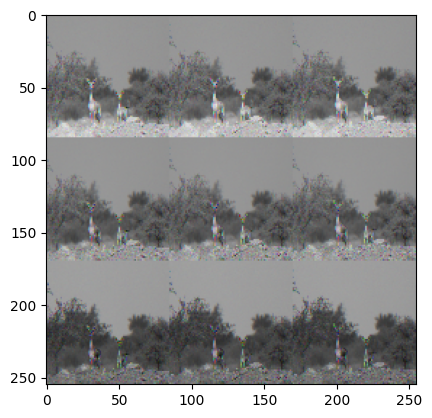

In [ ]:
plt.imshow(img_blob)

In [ ]:
yolo.setInput(blob)

In [ ]:
output_layer= yolo.getUnconnectedOutLayersNames()

In [ ]:
layer_output= yolo.forward(output_layer)

In [ ]:
height, width, channels= img.shape

Detecting objects and drawing boxes around them

In [ ]:
boxes= []
confidences= []
class_ids= []

for output in layer_output:
  for detection in output:
    score= detection[5:]
    class_id= np.argmax(score)
    confidence= score[class_id]
    if confidence > 0.2:
      ctr_x= int(detection[0]*width)
      ctr_y= int(detection[0]*height)
      w= int(detection[0]*width)
      h= int(detection[0]*height)

      x= int(ctr_x - h/2)
      y= int(ctr_y - w/2)

      boxes.append([x, y, w, h])
      confidences.append(float(confidence))
      class_ids.append(class_id)

In [ ]:
len(boxes)

5

In [ ]:
indexes= cv.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
print(len(indexes))

2


In [ ]:
font= cv.FONT_HERSHEY_PLAIN

Displaying the results

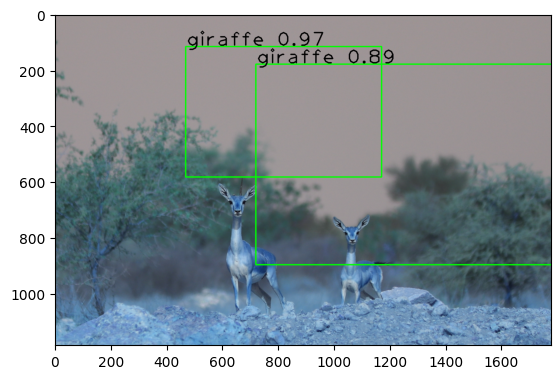

In [ ]:
for i in indexes.flatten():
  x,y,w,h= boxes[i]

  labels= str(classes[class_ids[i]])
  config= str(round(confidences[i], 2))
  color= (0, 255, 0)

  cv.rectangle(img, (x,y), (x+w, y+h), color, 3)
  cv.putText(img, labels + " " + config, (x,y), font, 5, (0,  0, 0), 3)


plt.imshow(img)

---

---

**HOG + SVM OBJECT DETECTION**


---



---



In [ ]:
import os

# Create folder named "pos_feat_ph"
if not os.path.exists("pos_feat_ph"):
    os.makedirs("pos_feat_ph")

# Create folder named "neg_feat_ph"
if not os.path.exists("neg_feat_ph"):
    os.makedirs("neg_feat_ph")


Finding features from deer and non-deer images

In [ ]:
from skimage.feature import local_binary_pattern
from skimage.feature import hog
from skimage.io import imread
import joblib
# To read file names
import argparse as ap
import glob
import os
import cv2

pos_im_path= "/content/drive/MyDrive/data.zip (Unzipped Files)/deer-train_cropped/deer"
neg_im_path= "/content/drive/MyDrive/data.zip (Unzipped Files)/deer-train_cropped/non-deer"

pos_feat_ph= "/content/pos_feat_ph"
neg_feat_ph= "/content/neg_feat_ph"

import cv2

print("Calculating the descriptors for the positive samples and saving them")
for im_path in glob.glob(os.path.join(pos_im_path, "*")):
    im = cv2.imread(im_path, 0)

    fd = hog(im, orientations= 9, pixels_per_cell= [8,8], cells_per_block= [3,3], visualize= True, block_norm='L1')

    fd_name = os.path.split(im_path)[1].split(".")[0] + ".feat"
    fd_path = os.path.join(pos_feat_ph, fd_name)
    joblib.dump(fd, fd_path)

print("Positive features saved in {}".format(pos_feat_ph))

print("Calculating the descriptors for the negative samples and saving them")

for im_path in glob.glob(os.path.join(neg_im_path, "*")):
    im = cv2.imread(im_path, 0)

    fd = hog(im, orientations= 9, pixels_per_cell= [8,8], cells_per_block= [3,3], visualize= True , block_norm='L1')

    fd_name = os.path.split(im_path)[1].split(".")[0] + ".feat"
    fd_path = os.path.join(neg_feat_ph, fd_name)
    joblib.dump(fd, fd_path)

print("Negative features saved in {}".format(neg_feat_ph))

print("Completed calculating features from training images")

Calculating the descriptors for the positive samples and saving them
Positive features saved in /content/pos_feat_ph
Calculating the descriptors for the negative samples and saving them
Negative features saved in /content/neg_feat_ph
Completed calculating features from training images


In [ ]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Classifiers supported
clf_type = 'LIN_SVM'
pos_feat_path= "/content/pos_feat_ph"
neg_feat_path= "/content/neg_feat_ph"



fds = []
labels = []
# Load the positive features
for feat_path in glob.glob(os.path.join(pos_feat_path,"*.feat")):
    fd = joblib.load(feat_path)

    fds.append(fd)
    labels.append(1)

# Load the negative features
for feat_path in glob.glob(os.path.join(neg_feat_path,"*.feat")):
    fd = joblib.load(feat_path)

    fds.append(fd)
    labels.append(0)

Flatten each element in features list by concatenating the 1D and 2D arrays

In [ ]:
import numpy as np

# Flatten each element in fds by concatenating the 1D and 2D arrays
fds_flattened = [np.concatenate((f[0], f[1].flatten())) for f in fds]

Find the maximum length of the flattened arrays

In [ ]:
# Find the maximum length of the flattened arrays
max_length = max([len(f) for f in fds_flattened])
print(max_length)

618417


Pad the flattened arrays with zeros to make them consistent in length

In [ ]:
# Pad the flattened arrays with zeros to make them consistent in length
fds_padded = [np.pad(f, (0, max_length - len(f))) for f in fds_flattened]

training the SVM classifier

In [ ]:
model_path= "/content/model"

clf = LinearSVC()

print("Training a Linear SVM Classifier")
clf.fit(fds_padded, labels)

Training a Linear SVM Classifier


LinearSVC()

Defining sliding window function

In [ ]:
def sliding_window(image, window_size, step_size):
    '''
    This function returns a patch of the input image `image` of size equal
    to `window_size`. The first image returned top-left co-ordinates (0, 0)
    and are increment in both x and y directions by the `step_size` supplied.
    So, the input parameters are -
    * `image` - Input Image
    * `window_size` - Size of Sliding Window
    * `step_size` - Incremented Size of Window

    The function returns a tuple -
    (x, y, im_window)
    where
    * x is the top-left x co-ordinate
    * y is the top-left y co-ordinate
    * im_window is the sliding window image
    '''
    for y in range(0, image.shape[0], step_size[1]):
        for x in range(0, image.shape[1], step_size[0]):
            yield (x, y, image[y:y + window_size[1], x:x + window_size[0]])


Performing detection on a new image

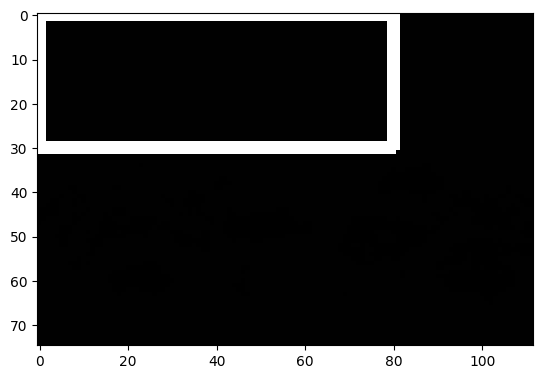

In [ ]:
import matplotlib.pyplot as plt
from skimage.transform import pyramid_gaussian
import cv2

# Read the image
im = cv2.imread("/content/drive/MyDrive/data.zip (Unzipped Files)/deer-test/6.jpg", 0)
min_wdw_sz = (80, 30)
step_size = (50, 50)
downscale = 2
visualize_det = True


# List to store the detections
detections = []
# The current scale of the image
scale = 0
# Downscale the image and iterate
for im_scaled in pyramid_gaussian(im, downscale=downscale):
    # This list contains detections at the current scale
    cd = []

    # If the width or height of the scaled image is less than
    # the width or height of the window, then end the iterations.
    if im_scaled.shape[0] < min_wdw_sz[1] or im_scaled.shape[1] < min_wdw_sz[0]:
        break
    for (x, y, im_window) in sliding_window(im_scaled, min_wdw_sz, step_size):
        if im_window.shape[0] != min_wdw_sz[1] or im_window.shape[1] != min_wdw_sz[0]:
            continue


        # Calculate the HOG features
        fd = hog(im_window, orientations= 9, pixels_per_cell= [8,8], cells_per_block= [3,3], visualize= True, block_norm='L1')
        fd_0 = fd[0].flatten()  # Flatten the first array
        fd_1 = fd[1].flatten()  # Already flattened

        # Then concatenate
        fd_c = np.concatenate((fd_0, fd_1))

        lst= fd_c
        length= 618417
        zeros = np.zeros(length - len(lst), dtype=np.int32)

        # Concatenate the original list and the numpy array of zeros
        fd_pad = np.concatenate((lst, zeros))



        pred = clf.predict(fd_pad.reshape(1, -1))
        if pred == 1:
            print("Detection:: Location -> ({}, {})".format(x, y))
            print("Scale ->  {} | Confidence Score {} \n".format(scale,clf.decision_function(fd)))
            detections.append((x, y, clf.decision_function(fd),
                int(min_wdw_sz[0]*(downscale**scale)),
                int(min_wdw_sz[1]*(downscale**scale))))
            cd.append(detections[-1])
        # If visualize is set to true, display the working
        # of the sliding window
        if visualize_det:

          # Adjust the contrast and brightness of the image
            im_scaled_vis = cv2.convertScaleAbs(im_scaled, alpha=1.5, beta=50)
            clone = im_scaled_vis.copy()
            for x1, y1, _, _, _  in cd:
                # Draw the detections at this scale
                cv2.rectangle(clone, (x1, y1), (x1 + im_window.shape[1], y1 +
                    im_window.shape[0]), (0, 0, 0), thickness=2)
            cv2.rectangle(clone, (x, y), (x + im_window.shape[1], y +
                im_window.shape[0]), (255, 255, 255), thickness=2)
            plt.imshow(clone, cmap= 'gray')
            cv2.waitKey(30)
    # Move the the next scale
    scale+=1


In [ ]:
print(len(detections))

0


Display the results before performing NMS

-1

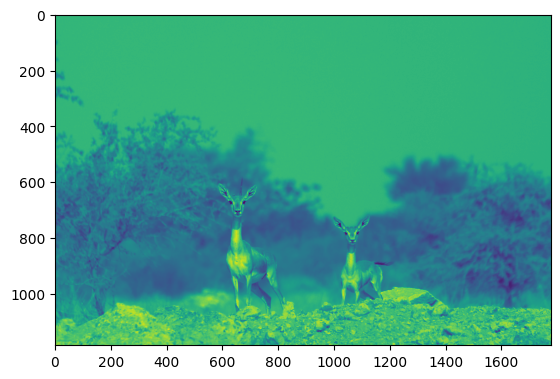

In [ ]:
# Display the results before performing NMS
clone = im.copy()
for (x_tl, y_tl, _, w, h) in detections:
    # Draw the detections
    cv2.rectangle(im, (x_tl, y_tl), (x_tl+w, y_tl+h), (0, 0, 0), thickness=2)

plt.imshow(im)
cv2.waitKey()

Perform Non Maxima Suppression

-1

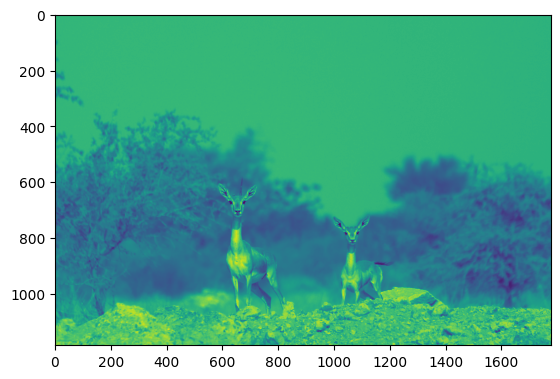

In [ ]:
# Perform Non Maxima Suppression
from imutils.object_detection import non_max_suppression

# Call the function
detections = non_max_suppression(detections)

# Display the results after performing NMS
for (x_tl, y_tl, _, w, h) in detections:
    # Draw the detections
    cv2.rectangle(clone, (x_tl, y_tl), (x_tl+w,y_tl+h), (0, 0, 0), thickness=2)
#cv2_imshow(clone)
plt.imshow(clone)
cv2.waitKey()